# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$ w_{new} = w_{old} - \alpha\left[ \frac{2}{n}\sum_{i=0}^n (x_{i}w_{old} - y_i) x_i^{\mathit T} + \frac{2}{C} w_{old} \right]$$


Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$ w_{new} = w_{old} - \alpha\left[ \frac{1}{n}\sum_{i=0}^n \left(\frac{1}{1 + \exp(-x_{i}w_{old})} - y_i\right) x_i^{\mathit T} + \frac{2}{C} w_{old} \right] = w_{old} - \alpha\left[ \frac{1}{n}\sum_{i=0}^n \left(\sigma(x_{i}w_{old}) - y_i\right) x_i^{\mathit T} + \frac{2}{C} w_{old} \right]$$

Таким образом, общая красивая формула (с точностью до констант):
$$ w_{new} = w_{old} - \alpha\left[ \frac{1}{n}\sum_{i=0}^n \left(a(x_i, w_{old}) - y_i\right) x_i^{\mathit T} + \frac{2}{C} w_{old} \right]$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Гессиан $H(f(x)) = \left\{ \frac{\partial f}{\partial x_ix_j} \right\}_{i,j=1}^k$

В нашем случае: $\nabla_w Q(w) = \frac{2}{N} \left( (X^TX)w - X^Ty \right) \Rightarrow H(Q(w)) =\frac{2}{N} X^TX$

Отбросив константу, покажем по определению, что $H(Q(w))$ положительно определена:

$$
\forall z \in \mathbb{R}^k, z \neq \theta: (Hz, z) > 0 \Leftrightarrow z^TX^TXz = (Xz)^T(Xz) = \|Xz\|^2 > 0 \space ( z \neq \theta, rank(X)=k )
$$

Теперь рассмотрим $L2$ регуляризацию.

$$
Q(w) = \frac{1}{N} \|Xw - y\|^2 + \frac{1}{C} \|w\|^2 = \frac{1}{N} (Xw - y)^T(Xw - y) + \frac{1}{C} w^Tw
$$

Из необходимого условие минимума:

$$
\nabla_w Q(w) = \frac{2}{N}\bigl( (X^TX)w - X^Ty \bigr) + \frac{2}{C} w = 0 \newline
\bigl( (X^TX) + \frac{N}{C} I \bigr) w = X^Ty \Rightarrow w^* = \bigl( (X^TX) + \frac{N}{C} I \bigr)^{-1} X^Ty
$$

Покажем, что всё корректно и матрица $\left( (X^TX) + \lambda I \right), \lambda = \frac{N}{C} > 0$ обратима и положительно определена:

$$
\forall z \in \mathbb{R}^k, z \neq \theta: z^T\left( (X^TX) + \lambda I \right)z = z^TX^TXz + \lambda z^TIz = \|Xz\|^2 + \lambda \|z\|^2 > 0 \space (\|Xz\|^2 \geqslant 0, \lambda \|z\|^2 > 0)
$$

Таким образом, матрица положительно определена и (по критерию Сильвестра) обратима. Получается $L2$ регулизация гарантирует существование точного решения даже при наличии линейно зависимых признаков.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$E(L | x_i) = -p(y_i = 1 | x_i) \log a(x_i) - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$

Продифференцируем $E(L | x_i)$ по $a$, с учетом того, что минимизующее $a(x_i) \not\equiv 0, a(x_i)\not\equiv 1$:

$$\frac{d}{d a(x_i)}E(L | x_i) = -p(y_i = 1 | x_i) \frac{1}{a(x_i)} + p(y_i = 0 | x_i) \frac{1}{1 - a(x_i)}$$

Пользуясь $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$ получаем:

$$\frac{d}{d a(x_i)}E(L | x_i) = \frac{-p(y_i = 1 | x_i)}{a(x_i)} + \frac{1 - p(y_i = 1 | x_i)}{1 - a(x_i)}$$

Тогда необходимое условие минимума:

$$\frac{-p(y_i = 1 | x_i)}{a(x_i)} + \frac{1 - p(y_i = 1 | x_i)}{1 - a(x_i)} = 0 \Rightarrow a^*(x_i) = p(y_i = 1 | x_i)$$

Проверим, что $a^*(x_i)$ действительно минимум:

$$\frac{d^2}{d a(x_i)^2}E(L | x_i) = \frac{p(y_i = 1 | x_i)}{a(x_i)^2} + \frac{1 - p(y_i = 1 | x_i)}{(1 - a(x_i))^2} \geqslant 0 $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет. Мы используем $w_0$ чтобы учитывать смещение целевой переменной на нулевом векторе весов (смещение гиперплоскости). Странно учитывать априорное представление о том, что смещение мало.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    if batch_size > X.shape[0]:
        batch_size = X.shape[0]

    idxs = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(idxs)
    rem_idx = X.shape[0] - X.shape[0] % batch_size

    for batch in idxs[:rem_idx].reshape(-1, batch_size):
        X_batch = X[batch]
        y_batch = y[batch]
        yield (X_batch, y_batch)

    if  X.shape[0] % batch_size:
        yield (X[idxs[rem_idx:]], y[idxs[rem_idx:]])

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    return 1.0 / (1.0 + np.exp(-x))


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', bound=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}  
        self.model_type = model_type
        self.bound = bound
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        w = self.weights[1:]
        w0 = self.weights[0]
        a = np.dot(X_batch, w) + w0
        if self.model_type == "log_reg":
            a = sigmoid(a)
        
        if self.model_type == "lin_reg":
            loss = (a - (y_batch - 0.5) * 2) ** 2
        elif self.model_type == "log_reg":
            loss = -(y_batch * np.log(a) + (1 - y_batch) * np.log(1.0 - a))
        else:
            raise NotImplementedError
        
        loss = loss.mean() + (1.0 / self.C) * np.dot(w, w)
        
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        w = self.weights[1:]
        w0 = self.weights[0]
        a = np.dot(X_batch, w) + w0
        if self.model_type == "log_reg":
            a = sigmoid(a)

        loss_grad = np.zeros(self.weights.shape)
        if self.model_type == "lin_reg":
            loss_grad[0] = (a - (y_batch - 0.5) * 2).sum()
            loss_grad[1:] = np.dot(X_batch.T, a - (y_batch - 0.5) * 2)
            loss_grad *= 2.0 / X_batch.shape[0];
        elif self.model_type == "log_reg":
            loss_grad[0] = (a - y_batch).sum()
            loss_grad[1:] = np.dot(X_batch.T, a - y_batch)
            loss_grad *= 1.0 / X_batch.shape[0];
        else:
            raise NotImplementedError
        
        loss_grad[1:] += (2.0 / self.C) * (w)
        
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        # Нужно инициализровать случайно веса
        self.weights = np.random.rand(X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        w = self.weights[1:]
        w0 = self.weights[0]
        a = np.dot(X, w) + w0
        if self.model_type == "lin_reg":
            y_hat = a > (self.bound - 0.5)
        elif self.model_type == "log_reg":
            y_hat = sigmoid(a) > self.bound
        else:
            raise NotImplementedError
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf, color):
    b = -clf.weights[0] / clf.weights[2]
    k = -clf.weights[1] / clf.weights[2]
    plt.plot([-2, 6], [k * -2 + b, k * 6 + b], color=color)

Веса линейной регрессии: [-1.25142015  0.28981686 -0.32811027]
Веса логистической регрессии [-2.57237998  0.68064895 -0.55117192]


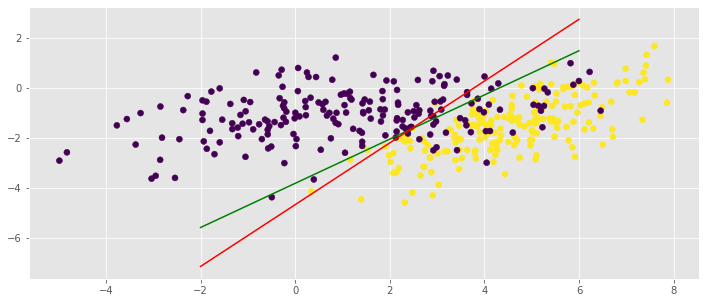

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

batch_gen = lambda X, y: batch_generator(X, y, shuffle=True, batch_size=10) 

lin_reg = MySGDClassifier(C=100, batch_generator=batch_gen, model_type="lin_reg", max_epoch=100)
lin_reg.fit(X, y)
plot_decision_boundary(lin_reg, "g")
print("Веса линейной регрессии:", lin_reg.weights)

log_reg = MySGDClassifier(C=100, batch_generator=batch_gen, model_type="log_reg", max_epoch=100)
log_reg.fit(X, y)
plot_decision_boundary(log_reg, "r")
print("Веса логистической регрессии", log_reg.weights)

_ = plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [12]:
N = 50
batch_gen = lambda X, y: batch_generator(X, y, shuffle=True, batch_size=200)

alpha_grid = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
alpha_loss = {"lin_reg": [], "log_reg": []}

for alpha in alpha_grid:
    lin_reg = MySGDClassifier(batch_generator=batch_gen, C=100, alpha=alpha, model_type="lin_reg", max_epoch=10)
    lin_reg.fit(X, y)
    loss = np.array(lin_reg.errors_log["loss"]).reshape(-1, N).mean(axis=1)
    alpha_loss["lin_reg"].append(loss)
    
    log_reg = MySGDClassifier(batch_generator=batch_gen, C=100, alpha=alpha, model_type="log_reg", max_epoch=10)
    log_reg.fit(X, y)
    loss = np.array(log_reg.errors_log["loss"]).reshape(-1, N).mean(axis=1)
    alpha_loss["log_reg"].append(loss)

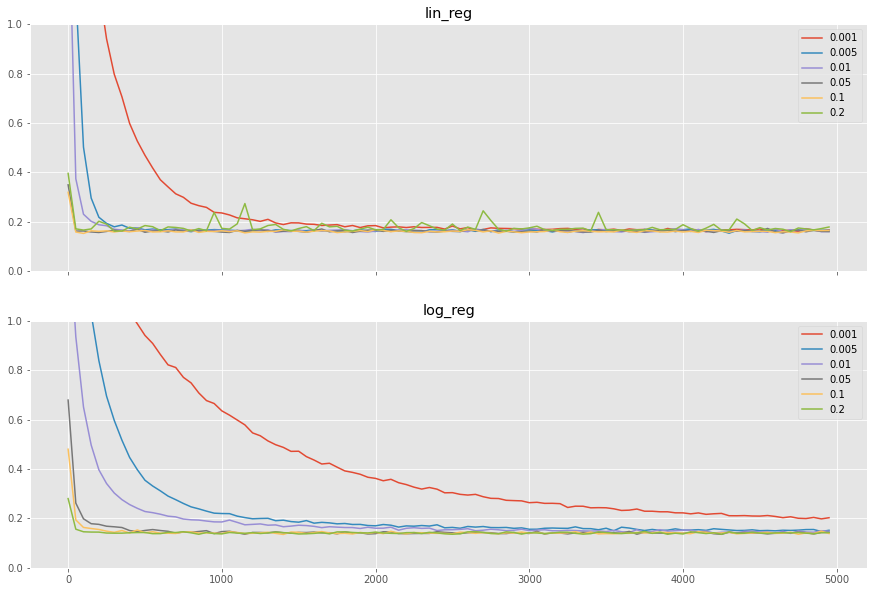

In [13]:
fig = plt.figure(figsize=(15,10))
axes = fig.subplots(2,1, sharex=True)

for ax, model in zip(axes, alpha_loss):
    ax.set_title(model)
    ax.set_ylim(0.0, 1.0)
    for alpha, loss in zip(alpha_grid, alpha_loss[model]):
        loss_steps = np.arange(loss.shape[0]) * N
        ax.plot(loss_steps, loss, label=str(alpha))
    ax.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

***Мой ответ здесь***

Чем `alpha` больше, тем сходится быстрее. Однако при слишком больших `alpha` значения начинают "прыгать" вокруг минимума (`lin_loss` с `alpha = 0.2`).

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [20]:
batch_gen = lambda X, y: batch_generator(X, y, shuffle=True, batch_size=200)

C_grid = np.logspace(3, -3, 10)
weights = {"lin_reg": [], "log_reg": []}

for C in C_grid:
    lin_reg = MySGDClassifier(batch_generator=batch_gen, C=C, alpha=0.0001, model_type="lin_reg", max_epoch=10)
    lin_reg.fit(X, y)
    weights["lin_reg"].append(np.abs(lin_reg.weights[1:]).mean())
    
    log_reg = MySGDClassifier(batch_generator=batch_gen, C=C, alpha=0.0001, model_type="log_reg", max_epoch=10)
    log_reg.fit(X, y)
    weights["log_reg"].append(np.abs(log_reg.weights[1:]).mean())

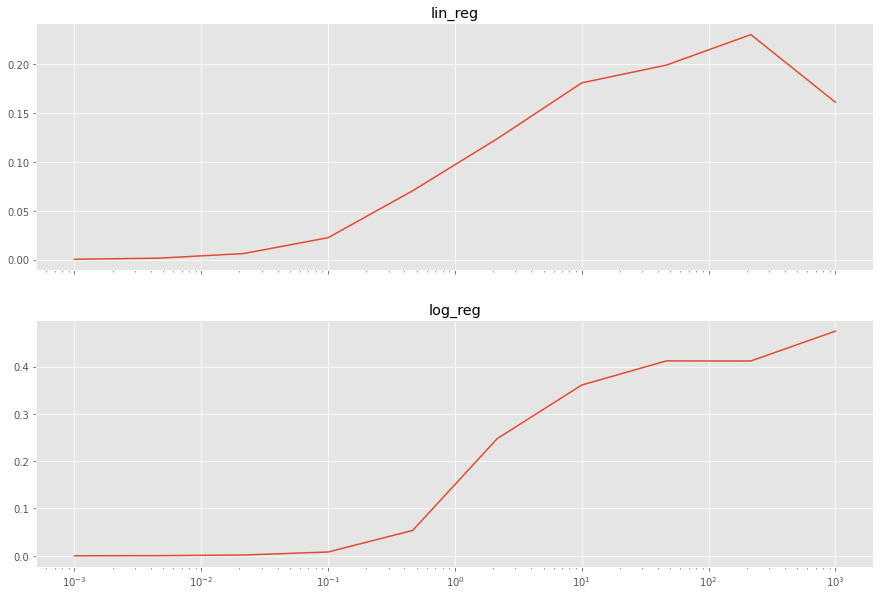

In [21]:
fig = plt.figure(figsize=(15,10))
axes = fig.subplots(2,1, sharex=True)

for ax, model in zip(axes, weights):
    ax.set_title(model)
    ax.plot(C_grid, weights[model])
    ax.set_xscale('log')

Довольны ли Вы, насколько сильно уменьшились Ваши веса?

In [22]:
weights["lin_reg"]

[0.16113880681062726,
 0.23035823627561833,
 0.19914203073262884,
 0.18095844258281138,
 0.12373830709062492,
 0.07047314400944932,
 0.022400681863669565,
 0.006155386508145385,
 0.0014525605857026282,
 0.00032119239114609846]

In [23]:
weights["log_reg"]

[0.47471375944350325,
 0.4116416960818742,
 0.4118207668720598,
 0.3608672679698768,
 0.24760382570076964,
 0.05362721345423682,
 0.008030496789832956,
 0.0016673545789906766,
 0.00035598717848958774,
 8.020299024516807e-05]

***Мой ответ здесь***

Вполне, при средних `C`. При слишком больших регуляризация не играет роли, при слишком маленьких наоборот.

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [24]:
doc_to_title = {}
with open('docs_titles.tsv', encoding="utf-8") as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [25]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [26]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [27]:
np.unique(groups_train).shape

(129,)

In [28]:
cn = 0
cp = 0
for group in range(1, 130):
    idxs = np.where(groups_train == group)
    uniq = np.unique(y_train[idxs], return_counts=True)[1]
    if uniq[1] > uniq[0]: cp += 1
    if uniq[1] < uniq[0]: cn += 1
print(cn, cp)

92 36


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [29]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [31]:
n_splits = 13
np.random.seed(0)

def cv(groups):
    for group in np.arange(1, 130, 10):
        idxs = (groups < group + 10) & (groups >= group)
        yield (np.where(~idxs), np.where(idxs))

def validate(clf, X, y, groups):
    f_scores = np.zeros(n_splits)
    
    for i, (idxs_train, idxs_val) in enumerate(cv(groups)):
        X_train = X[idxs_train]
        X_val = X[idxs_val]
        y_train = y[idxs_train]
        y_val = y[idxs_val]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        f_scores[i] = f1_score(y_val, y_pred)

    return f_scores.mean()

def mean_validate(clf, X, y, groups, n=10):
    scores = np.zeros(n)
    for i in range(n):
        scores[i] = validate(clf, X, y, groups)
    return scores.mean()

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [32]:
batch_gen = lambda X, y: batch_generator(X, y, shuffle=False, batch_size=200)

params = {
    "C": [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 50, 100, 500, 1000],
    "alpha": [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    "max_epoch":[5, 10, 20, 50, 100],
}

best_lin = {
    "C": None,
    "alpha": None,
    "max_epoch": None,
    "bound": None
}

best_log = {
    "C": None,
    "alpha": None,
    "max_epoch": None,
    "bound": None
}

In [33]:
lin_score = []
log_score = []

for C in params["C"]:
    print("Start with", C)
    
    lin_reg = MySGDClassifier(batch_generator=batch_gen, C=C, alpha=0.00005,
                              max_epoch=20, model_type="lin_reg")
    lin_score.append(mean_validate(lin_reg, X_train, y_train, groups_train))
    log_reg = MySGDClassifier(batch_generator=batch_gen, C=C, alpha=0.00005,
                              max_epoch=20, model_type="log_reg")
    log_score.append(mean_validate(log_reg, X_train, y_train, groups_train))
    
    print("End with score", lin_score[-1], log_score[-1])

Start with 0.001


d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log


End with score 0.4300374854445175 0.4316329460936409
Start with 0.005
End with score 0.4472476211150602 0.4404830733476774
Start with 0.01
End with score 0.4560720121471336 0.4441363477114274
Start with 0.05


d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


End with score 0.48852546225492144 0.5194919342154978
Start with 0.1
End with score 0.530182743386323 0.576492575450522
Start with 1
End with score 0.5683666821997714 0.5863853251892388
Start with 10
End with score 0.5765123692144579 0.5858037882492115
Start with 50
End with score 0.5760026992111635 0.5869571192669523
Start with 100
End with score 0.5759818800092784 0.5851557231785768
Start with 500
End with score 0.5731623568161067 0.5866484216750925
Start with 1000
End with score 0.5750175335501887 0.586038390912679


For lin_reg best param 10 with score 0.5765123692144579
For log_reg best param 50 with score 0.5869571192669523


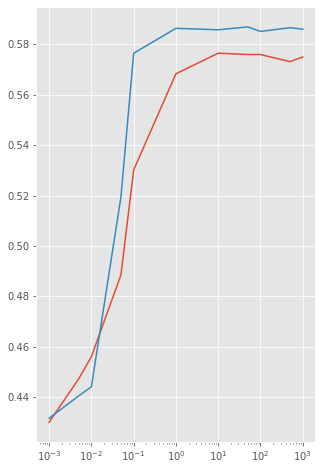

In [34]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

ax.plot(params["C"], lin_score)
ax.plot(params["C"], log_score)
ax.set_xscale("log")

print(f"For lin_reg best param {params['C'][np.argmax(lin_score)]} with score {np.max(lin_score)}")
print(f"For log_reg best param {params['C'][np.argmax(log_score)]} with score {np.max(log_score)}")
best_lin["C"] = params["C"][np.argmax(lin_score)]
best_log["C"] = params["C"][np.argmax(log_score)]

In [35]:
lin_score = []
log_score = []

for alpha in params["alpha"]:
    print("Start with", alpha)
    
    lin_reg = MySGDClassifier(batch_generator=batch_gen, C=best_lin["C"], alpha=alpha,
                              max_epoch=20, model_type="lin_reg")
    lin_score.append(mean_validate(lin_reg, X_train, y_train, groups_train))
    log_reg = MySGDClassifier(batch_generator=batch_gen, C=best_log["C"], alpha=alpha,
                              max_epoch=20, model_type="log_reg")
    log_score.append(mean_validate(log_reg, X_train, y_train, groups_train))
    
    print("End with score", lin_score[-1], log_score[-1])

Start with 1e-05


d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


End with score 0.587081804357962 0.585928590549446
Start with 5e-05
End with score 0.5723260902709415 0.5869071810776291
Start with 0.0001
End with score 0.5357889595910317 0.5868242645646236
Start with 0.0005
End with score 0.5498747105785504 0.5866810928054209
Start with 0.001
End with score 0.5027178194135912 0.5866165277700377
Start with 0.005
End with score 0.49475208503877416 0.5681220033283795
Start with 0.01
End with score 0.5076074213315857 0.5220929039438291
Start with 0.05
End with score 0.5191734427487928 0.5033554398911786
Start with 0.1
End with score 0.5150969788789397 0.5157125821316517


For lin_reg best param 1e-05 with score 0.587081804357962
For log_reg best param 5e-05 with score 0.5869071810776291


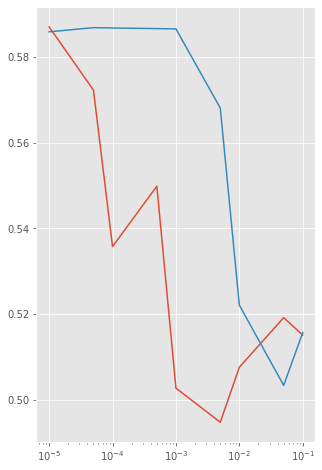

In [36]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

ax.plot(params["alpha"], lin_score)
ax.plot(params["alpha"], log_score)
ax.set_xscale("log")

print(f"For lin_reg best param {params['alpha'][np.argmax(lin_score)]} with score {np.max(lin_score)}")
print(f"For log_reg best param {params['alpha'][np.argmax(log_score)]} with score {np.max(log_score)}")
best_lin["alpha"] = params["alpha"][np.argmax(lin_score)]
best_log["alpha"] = params["alpha"][np.argmax(log_score)]

In [37]:
lin_score = []
log_score = []

for max_epoch in params["max_epoch"]:
    print("Start with", max_epoch)
    
    lin_reg = MySGDClassifier(batch_generator=batch_gen, C=best_lin["C"], alpha=best_lin["alpha"],
                              max_epoch=max_epoch, model_type="lin_reg")
    lin_score.append(mean_validate(lin_reg, X_train, y_train, groups_train))
    log_reg = MySGDClassifier(batch_generator=batch_gen, C=best_log["C"], alpha=best_log["alpha"],
                              max_epoch=max_epoch, model_type="log_reg")
    log_score.append(mean_validate(log_reg, X_train, y_train, groups_train))
    
    print("End with score", lin_score[-1], log_score[-1])

Start with 5


d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


End with score 0.5859448451797922 0.5856392165993987
Start with 10
End with score 0.5860701854602333 0.5865078072930754
Start with 20
End with score 0.5863129615381782 0.586649174844071
Start with 50
End with score 0.5842338469657642 0.5865318192311312
Start with 100
End with score 0.5753423812700876 0.5853997705510275


For lin_reg best param 20 with score 0.5863129615381782
For log_reg best param 20 with score 0.586649174844071


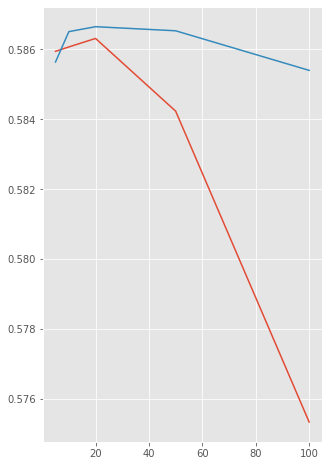

In [38]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

ax.plot(params["max_epoch"], lin_score)
ax.plot(params["max_epoch"], log_score)

print(f"For lin_reg best param {params['max_epoch'][np.argmax(lin_score)]} with score {np.max(lin_score)}")
print(f"For log_reg best param {params['max_epoch'][np.argmax(log_score)]} with score {np.max(log_score)}")
best_lin["max_epoch"] = params["max_epoch"][np.argmax(lin_score)]
best_log["max_epoch"] = params["max_epoch"][np.argmax(log_score)]

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [39]:
bound_grid = np.arange(0.2, 1.0, 0.05)

lin_score = []
log_score = []

for bound in bound_grid:
    print("Start with", bound)
    
    lin_reg = MySGDClassifier(batch_generator=batch_gen, C=best_lin["C"], alpha=best_lin["alpha"],
                              max_epoch=best_lin["max_epoch"], model_type="lin_reg", bound=bound)
    lin_score.append(mean_validate(lin_reg, X_train, y_train, groups_train))
    log_reg = MySGDClassifier(batch_generator=batch_gen, C=best_log["C"], alpha=best_log["alpha"],
                              max_epoch=best_log["max_epoch"], model_type="log_reg", bound=bound)
    log_score.append(mean_validate(log_reg, X_train, y_train, groups_train))
    
    print("End with score", lin_score[-1], log_score[-1])

Start with 0.2


d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


End with score 0.5860694576666182 0.5764072375016809
Start with 0.25
End with score 0.5854100795777177 0.5822310401102971
Start with 0.3
End with score 0.5856053629129143 0.5817573642442426
Start with 0.35
End with score 0.5846942404492079 0.5846886711990207
Start with 0.39999999999999997
End with score 0.58487276038961 0.5851882783805175
Start with 0.44999999999999996
End with score 0.5855868200716188 0.5857768916969711
Start with 0.49999999999999994
End with score 0.5871886617722353 0.5852007226913157
Start with 0.5499999999999999
End with score 0.5849049627598192 0.587366636398
Start with 0.5999999999999999
End with score 0.5871971744779348 0.587712937312329
Start with 0.6499999999999999
End with score 0.5863768832937388 0.5864131188257802
Start with 0.7
End with score 0.5853546753779917 0.5886539944627327
Start with 0.7499999999999998
End with score 0.5860040175288741 0.5886373504106188
Start with 0.7999999999999998
End with score 0.5887186399366529 0.585818748733877
Start with 0.8

For lin_reg best bound 0.7999999999999998 with score 0.5887186399366529
For log_reg best bound 0.7 with score 0.5886539944627327


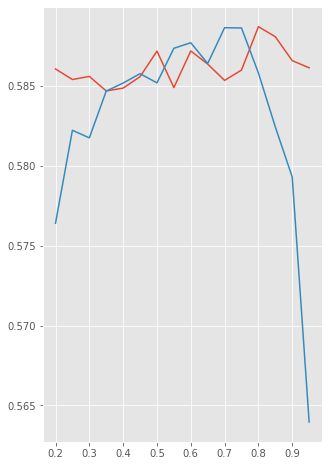

In [40]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

ax.plot(bound_grid, lin_score)
ax.plot(bound_grid, log_score)

print(f"For lin_reg best bound {bound_grid[np.argmax(lin_score)]} with score {np.max(lin_score)}")
print(f"For log_reg best bound {bound_grid[np.argmax(log_score)]} with score {np.max(log_score)}")
best_lin["bound"] = bound_grid[np.argmax(lin_score)]
best_log["bound"] = bound_grid[np.argmax(log_score)]

In [41]:
best_lin, best_log # + model_type = log_reg

({'C': 10, 'alpha': 1e-05, 'max_epoch': 20, 'bound': 0.7999999999999998},
 {'C': 50, 'alpha': 5e-05, 'max_epoch': 20, 'bound': 0.7})

In [43]:
best_lin_clf = MySGDClassifier(batch_generator=batch_gen, model_type="lin_reg", **best_lin)

best_log_clf = MySGDClassifier(batch_generator=batch_gen, model_type="log_reg", **best_log)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [44]:
test_data = pd.read_csv('test_groups.csv')

In [45]:
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


In [46]:
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [47]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [48]:
X_test = scaler.transform(X_test)

In [51]:
best_log_clf.fit(X_train, y_train)
y_pred = best_log_clf.predict(X_test)
y_pred.shape

d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
d:\packprogs\python379conda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


(16627,)

In [52]:
df = pd.DataFrame({'pair_id': test_data['pair_id'], 'target': y_pred.astype(np.int32)})
df = df.set_index(['pair_id'])
df.to_csv('log_submission.csv')

**При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline.**

In [ ]:
Anton Kolotov

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

Свободный вес `w0` и его роль в жизни модели.

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***